#                👓📚📓📒         🎓📖📝🔎

# Análisis Exploratorio de Datos del dataset de la plataforma Udemy

Se instalan las librerías necesarias

In [1]:
!pip install wordcloud==1.9.2

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


Se importan las librerías a utilizar 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS
#from pandas_profiling import ProfileReport

Se estandariza como se visualizaran los graficos

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (10, 5)

Se carga el dataset y se crea el Dataframe con el cual se trabajara en este análisis

In [4]:
 ude = pd.read_csv('/work/udemy_courses.csv')

In [5]:
ude

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


Se exploran los tipos de datos de cada columna

In [6]:
ude.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


Cantidad de inscriptos totales en los cursos de la plataforma en este dataset

In [7]:
ude['num_subscribers'].sum()

11759120

Se pasa la columna de fecha de publicación al tipo de dato adecuado, también se hace lo mismo con la columna de nivel del curso y de tema del curso

In [8]:
ude['published_timestamp'] = pd.to_datetime(ude['published_timestamp'])
ude = ude.astype({'level': 'category'})
ude = ude.astype({'subject': 'category'})

In [9]:
ude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   course_id            3678 non-null   int64              
 1   course_title         3678 non-null   object             
 2   url                  3678 non-null   object             
 3   is_paid              3678 non-null   bool               
 4   price                3678 non-null   int64              
 5   num_subscribers      3678 non-null   int64              
 6   num_reviews          3678 non-null   int64              
 7   num_lectures         3678 non-null   int64              
 8   level                3678 non-null   category           
 9   content_duration     3678 non-null   float64            
 10  published_timestamp  3678 non-null   datetime64[ns, UTC]
 11  subject              3678 non-null   category           
dtypes: bool(1), category

Se descarta columna que no se utilizara en el analisis

In [10]:
ude.drop(['url'], axis=1, inplace=True)

Se calcula la cantidad de inscriptos en los cursos gratis y en los pagos 

In [11]:
suscriptores_pagos = ude.loc[ude['is_paid'], 'num_subscribers'].sum()
suscriptores_gratis = ude.loc[~ude['is_paid'], 'num_subscribers'].sum()
print(suscriptores_gratis, suscriptores_pagos)

3575525 8183595


Se muestra la proporción de inscriptos en las diferentes temas de cursos a través del tiempo

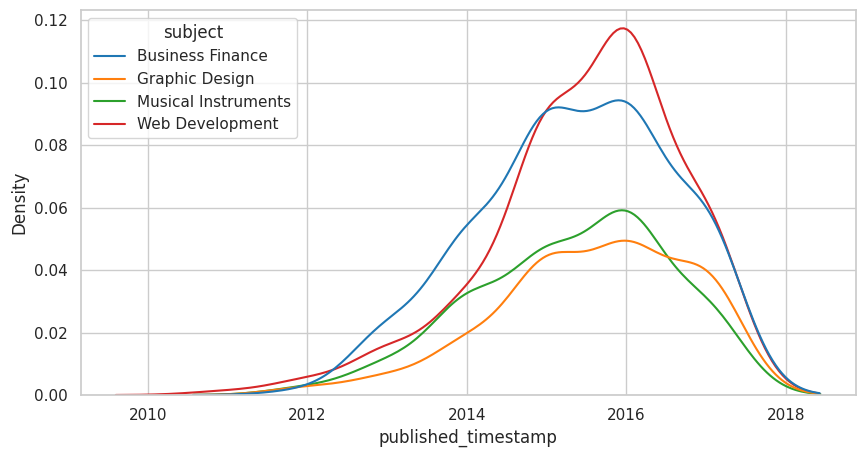

In [12]:
sns.kdeplot(
    data=ude,
    x=ude['published_timestamp'].dt.year,
    hue='subject',
    bw_method=0.4
);

Se muestra la proporción entre los inscriptos en cursos pagos y gratis a través del tiempo

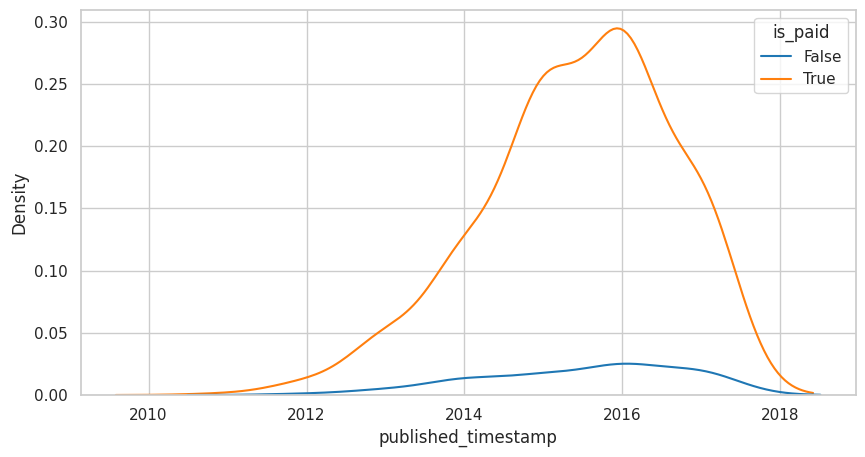

In [13]:
sns.kdeplot(
    data=ude,
    x=ude['published_timestamp'].dt.year,
    hue='is_paid',
    bw_method=0.4
);

Se muestra el total de inscriptos en cursos pagos y en los gratis, se puede observar que mas de 2/3 de los inscriptos lo han hecho en los pagos

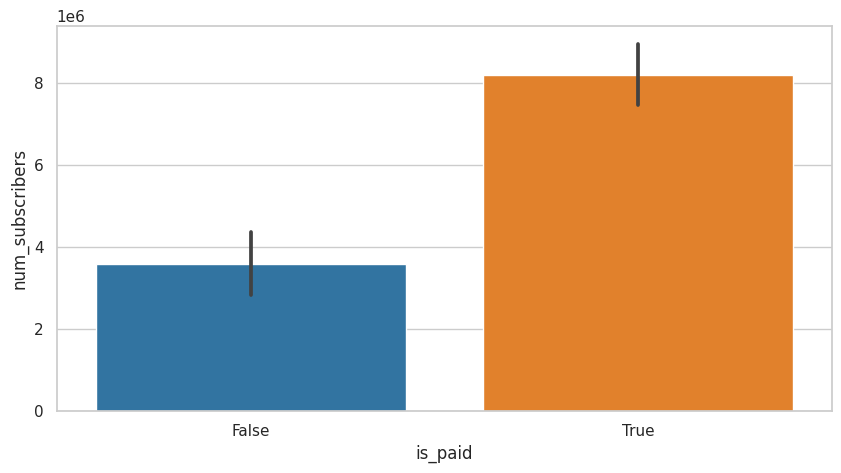

In [14]:
sns.barplot(
    data=ude,
    x='is_paid',
    y='num_subscribers',
    estimator='sum'
);

Se muestra la relación entre el numero de inscriptos en un curso con el numero de reseñas del mismo por cada tema

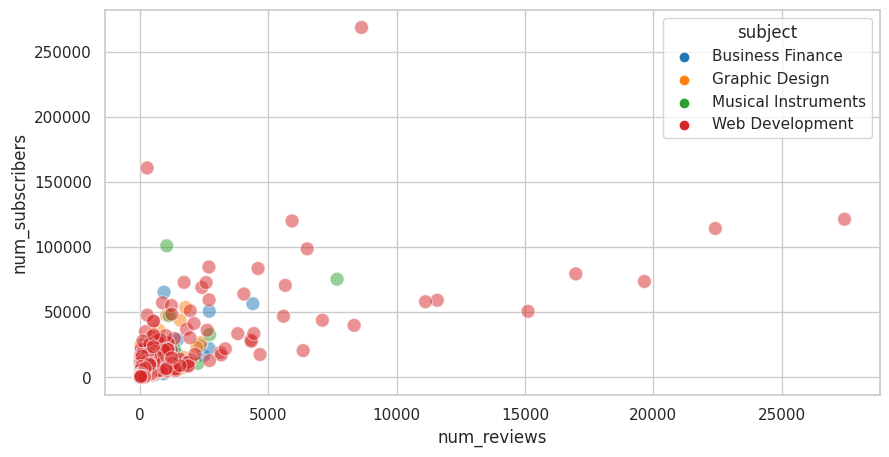

In [15]:
sns.scatterplot(
    data=ude,
    x='num_reviews',
    y='num_subscribers',
    hue='subject',
    alpha=0.5,
    s=100
);

Relación entre la cantidad de clases y la duración del curso por cada tema

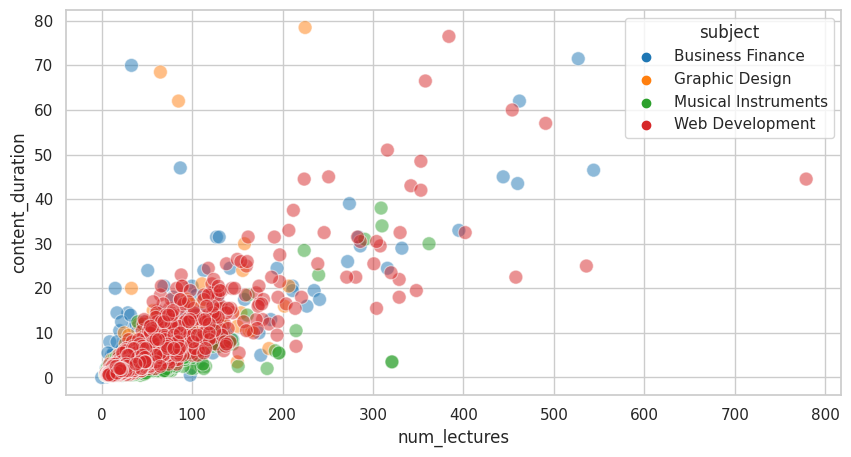

In [16]:
sns.scatterplot(
    data=ude,
    x='num_lectures',
    y='content_duration',
    hue='subject',
    alpha=0.5,
    s=100
);

Se muestra el promedio de duración de cada curso agrupados por tema, se observa que los de desarrollo web duran casi el doble que los del resto de los temas

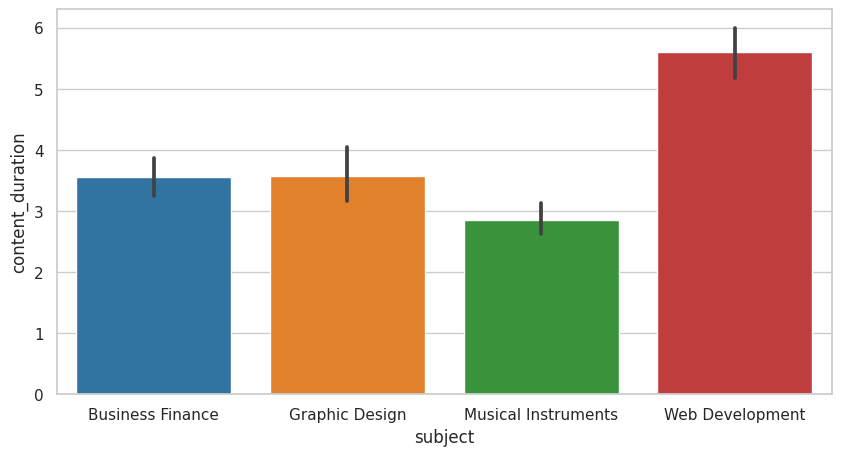

In [17]:
sns.barplot(
    data=ude,
    x='subject',
    y='content_duration',
);

Relación entre el numero de inscriptos y el precio de cada curso diferenciado por niveles

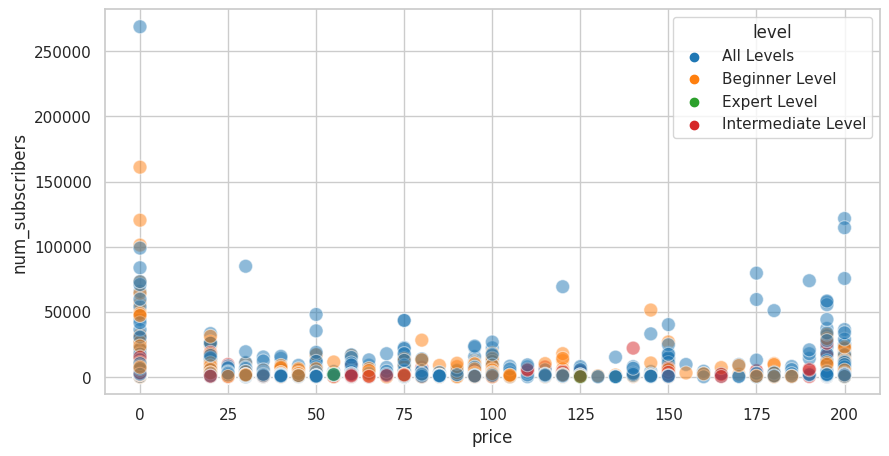

In [18]:
sns.scatterplot(
    data=ude,
    x='price',
    y='num_subscribers',
    hue='level',
    alpha=0.5,
    s=100
);

Se muestra a continuación el numero de inscriptos por precio de los cursos por cada nivel en particular

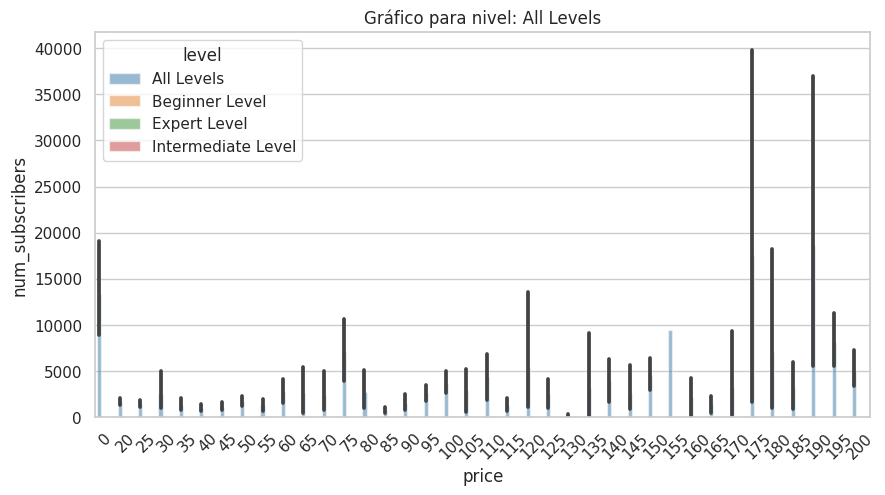

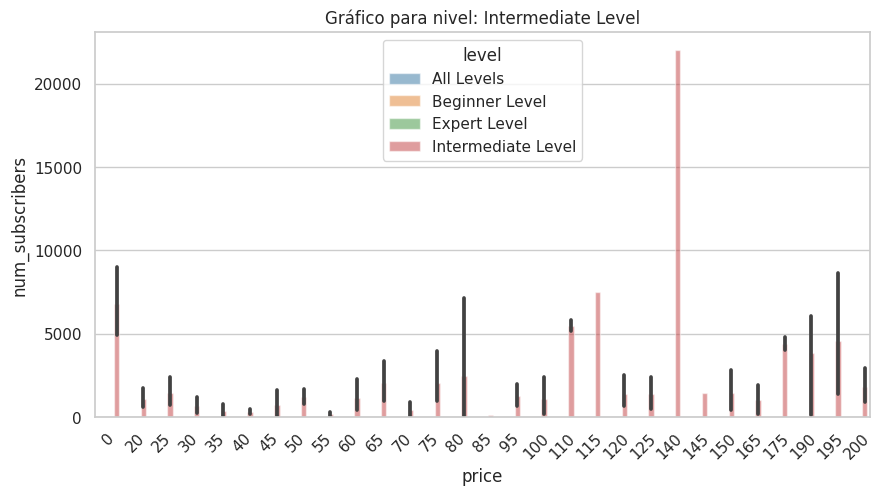

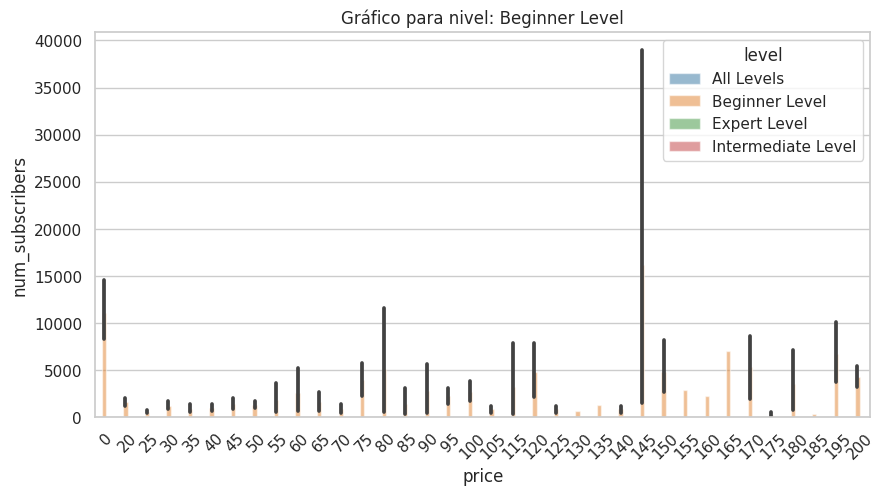

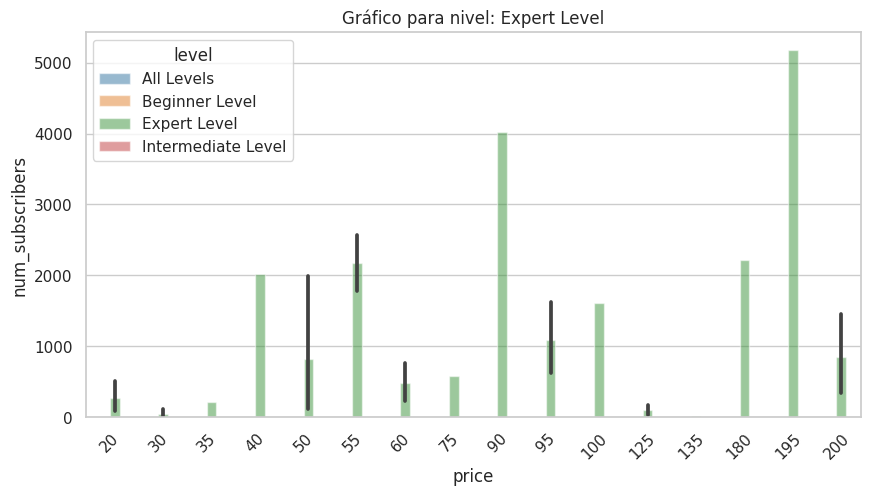

In [19]:
valores_level = ude['level'].unique()

for valor in valores_level:

    df_filtrado = ude[ude['level'] == valor]
    
    sns.barplot(
        data=df_filtrado,
        x='price',
        y='num_subscribers',
        hue='level',
        alpha=0.5,
        #s=100
    )
    plt.title(f'Gráfico para nivel: {valor}')
    plt.xticks(rotation=45)
    plt.show()

A continuación se muestra el numero de inscriptos por precios de los cursos diferenciado por cada tema en particular

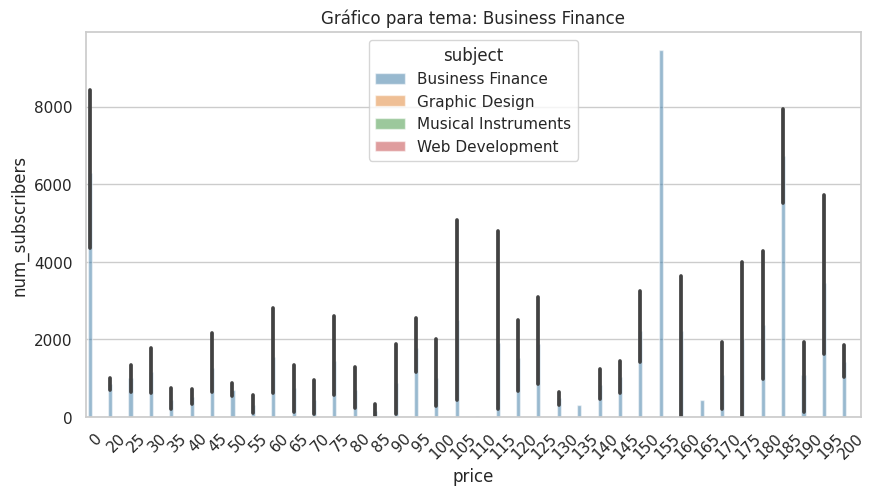

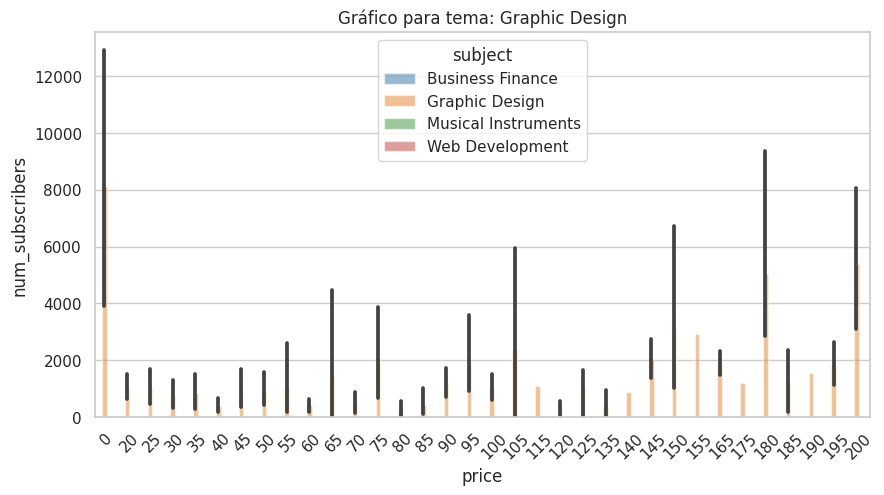

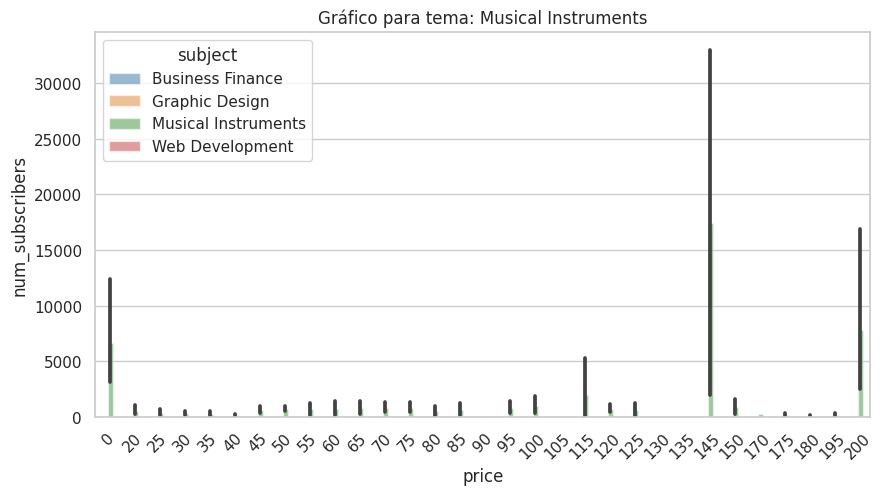

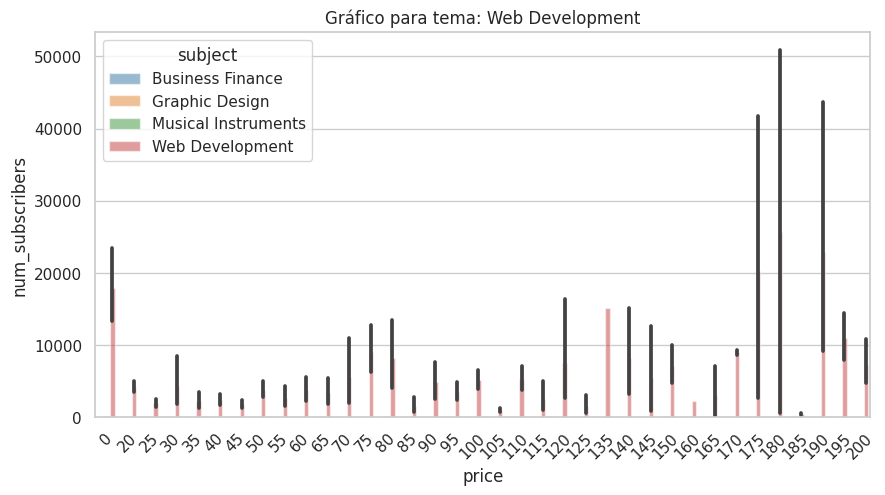

In [20]:
valores_level = ude['subject'].unique()

for valor in valores_level:

    df_filtrado = ude[ude['subject'] == valor]
    
    sns.barplot(
        data=df_filtrado,
        x='price',
        y='num_subscribers',
        hue='subject',
        alpha=0.5,
        #s=100
    )
    plt.title(f'Gráfico para tema: {valor}')
    plt.xticks(rotation=45)
    plt.show()

Se muestran la variación de los precios de los cursos por cada tema en especifico a través de un grafico de caja, se puede observar que los cursos de desarrollo web y finanzas de negocios son los que mayor costo tienen

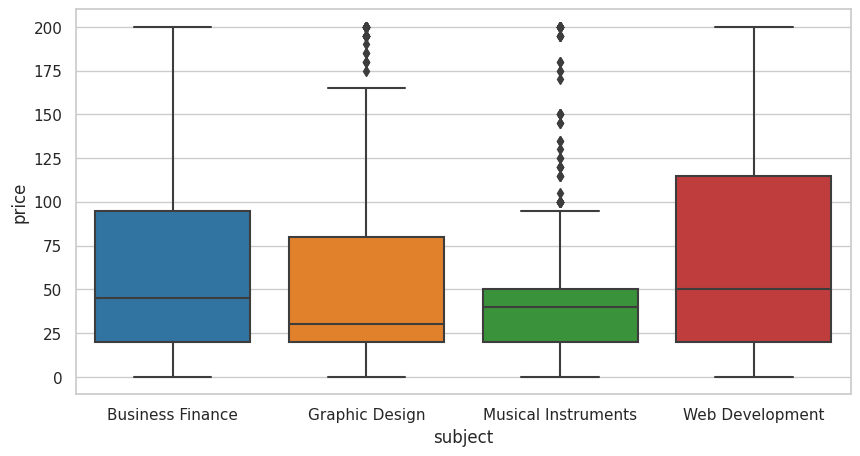

In [21]:
sns.boxplot(
    data=ude,
    x='subject',
    y='price'
);

Se muestra el promedio de inscriptos en los cursos por cada tema en especifico, se nota claramente que desarrollo web tiene casi un promedio de inscriptos similar a los otros 3 temas juntos

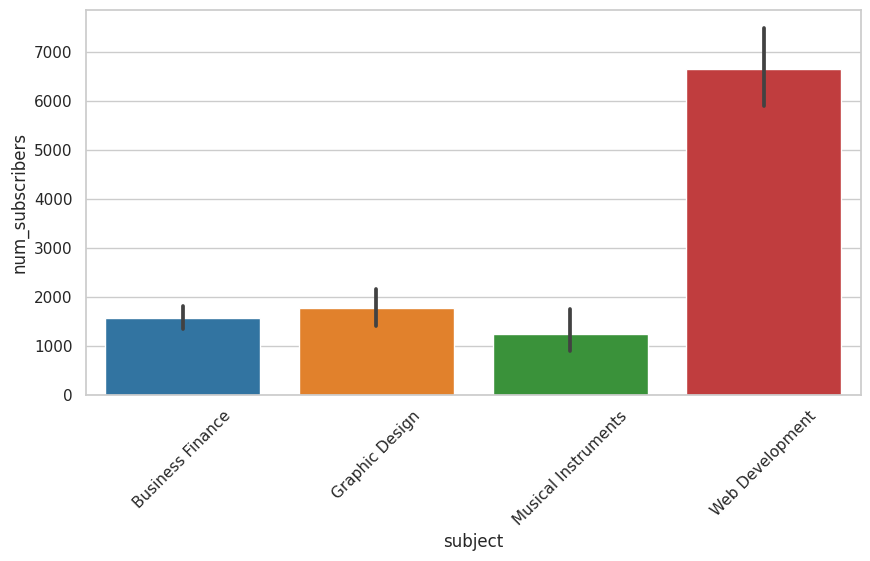

In [22]:
sns.barplot(
    data=ude,
    x='subject',
    y='num_subscribers'
    )
plt.xticks(rotation=45)
plt.show()


Lo mismo del grafico anterior pasa con el numero de reseñas

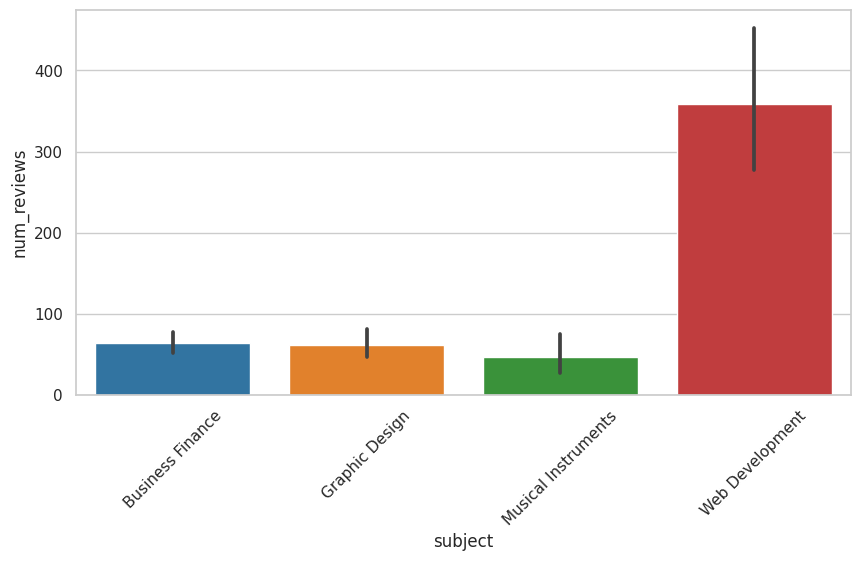

In [23]:
sns.barplot(
    data=ude,
    x='subject',
    y='num_reviews'
    )
plt.xticks(rotation=45)
plt.show()

Se muestra el promedio de inscriptos por cada nivel de curso en particular, se puede observar que a medida que aumenta el nivel del curso va bajando el promedio de inscriptos en los mismos

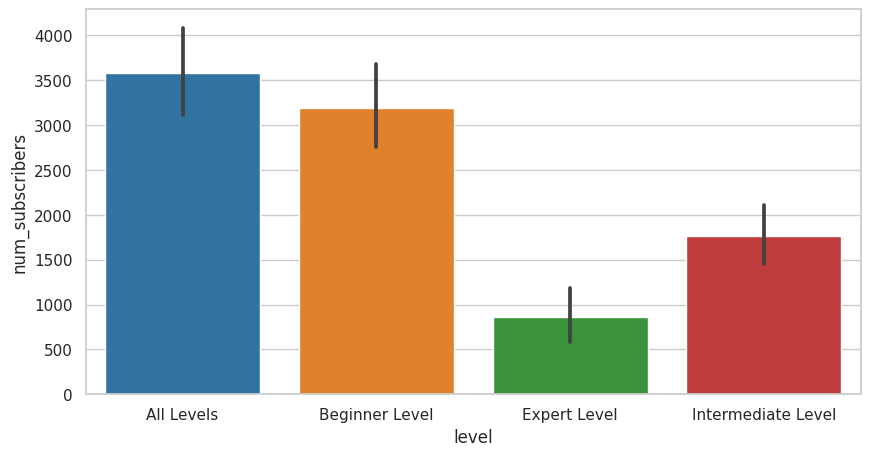

In [24]:
sns.barplot(
    data=ude,
    x='level',
    y='num_subscribers'
);

Se muestra a continuación  la cantidad de cursos por tema, se ve que desarrollo web y finanzas de negocios son los temas de los que hay mas cursos

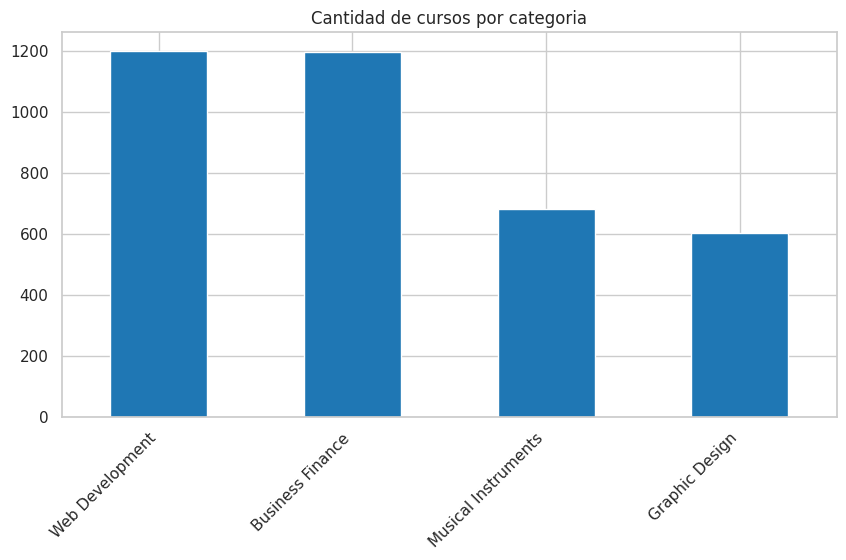

In [25]:
ude.subject.value_counts().plot(kind='bar', xlabel='', title='Cantidad de cursos por categoria')
plt.xticks(rotation=45, ha='right')
plt.show()

A continuación se muestra el precio promedio de los cursos por temas diferenciados por nivel, se nota que el precio no varia mucho entre los diferentes niveles. Por tema se nota que los de desarrollo web con los mas costosos en promedio 

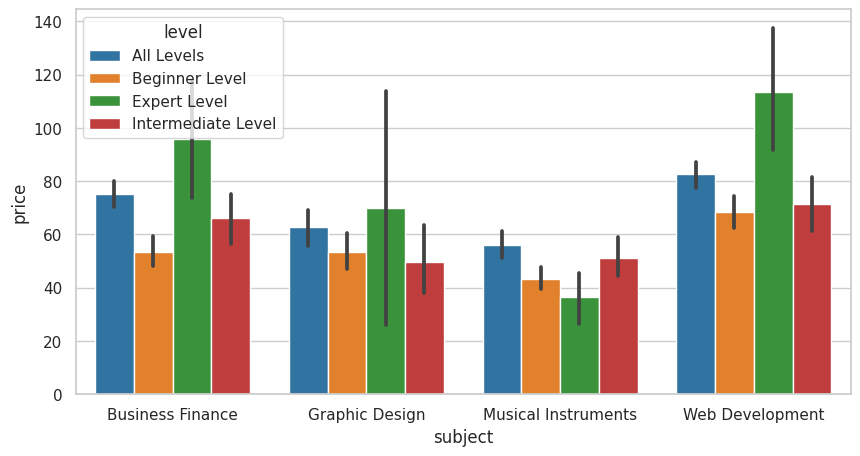

In [26]:
sns.barplot(
    data=ude,
    x='subject',
    y='price',
    hue='level'
    );

En este grafico se muestra que promedio de inscriptos por cada tema, diferenciado por cada nivel, se aprecia de nuevo que desarrollo web es el que mas inscriptos tiene por lejos

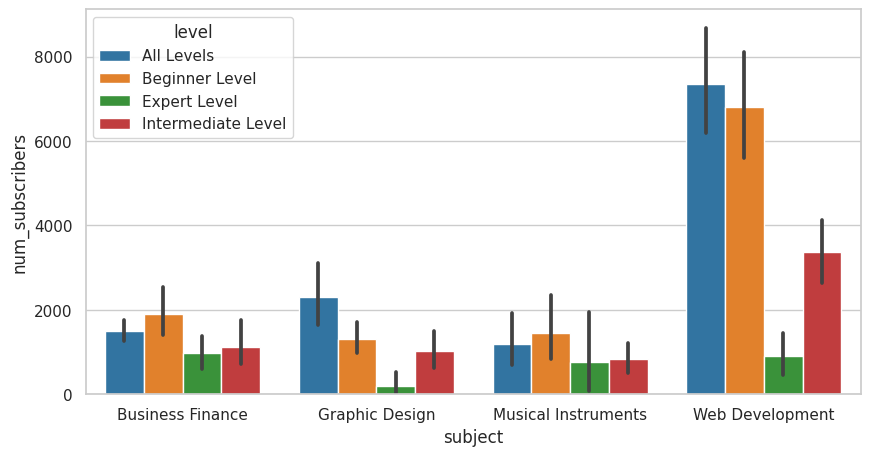

In [27]:
sns.barplot(
    data=ude, 
    x='subject', 
    y='num_subscribers', 
    hue='level'
    );

A continuación se ve la distribución de precios de los cursos por cada nivel

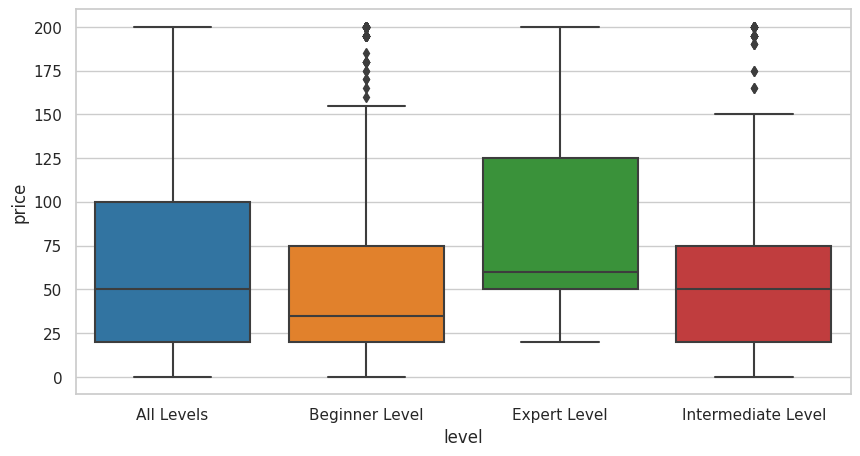

In [28]:
sns.boxplot(
    data=ude,
    x='level',
    y='price'
);

Relación entre el promedio de inscriptos por curso y la duración del contenido de los mismos

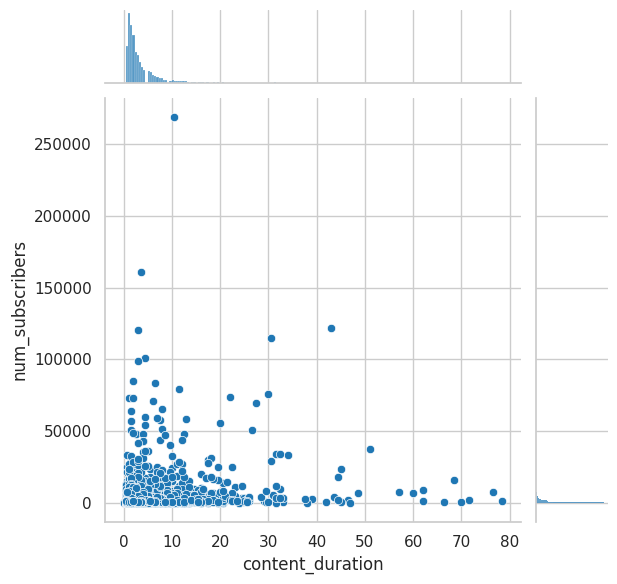

In [29]:
sns.jointplot(
    data=ude,
    x='content_duration',
    y='num_subscribers'
);

Se segmenta por precio del curso, se eligen los valores 50 $ y 150 $ como limite entre el intervalo bajo-medio y medio-alto respectivamente, estos valores se los asigna por observación del comportamiento del precio de los gráficos anteriores. 

In [30]:
limites = [-1, 1, 50, 150, 200]  
segmentos = ['Free', 'Low', 'Medium', 'High']
ude['price_level'] = pd.cut(ude['price'], bins=limites, labels=segmentos)


In [31]:
ude

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,price_level
0,1070968,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18 20:58:58+00:00,Business Finance,High
1,1113822,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09 16:34:20+00:00,Business Finance,Medium
2,1006314,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19 19:26:30+00:00,Business Finance,Low
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30 20:07:24+00:00,Business Finance,Medium
4,1011058,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13 14:57:18+00:00,Business Finance,High
...,...,...,...,...,...,...,...,...,...,...,...,...
3673,775618,Learn jQuery from Scratch - Master of JavaScri...,True,100,1040,14,21,All Levels,2.0,2016-06-14 17:36:46+00:00,Web Development,Medium
3674,1088178,How To Design A WordPress Website With No Codi...,True,25,306,3,42,Beginner Level,3.5,2017-03-10 22:24:30+00:00,Web Development,Low
3675,635248,Learn and Build using Polymer,True,40,513,169,48,All Levels,3.5,2015-12-30 16:41:42+00:00,Web Development,Low
3676,905096,CSS Animations: Create Amazing Effects on Your...,True,50,300,31,38,All Levels,3.0,2016-08-11 19:06:15+00:00,Web Development,Low


Se grafica la cantidad de inscriptos en los cursos por nivel de precio, se observa que es similar la cantidad en cada uno de los niveles, incluso en el nivel alto de precios hay mas inscriptos que en el nivel medio. Este comportamiento raro se da por los descuentos que ofrece Udemy de sus cursos, por esto los cursos figuran con un costo alto, pero en realidad se venden a un precio mas bajo que no se ve reflejado en el dataset. 

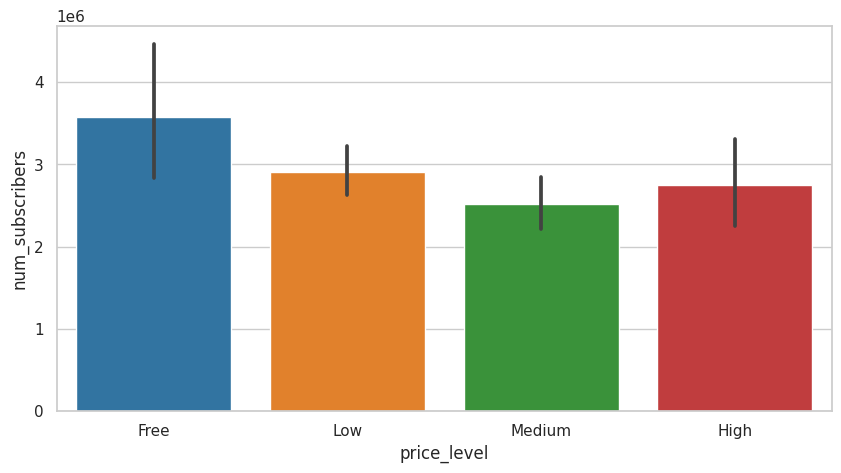

In [32]:
sns.barplot(
    data=ude,
    x='price_level',
    y='num_subscribers',
    estimator='sum'
);

Nube de palabras del titulo de los cursos

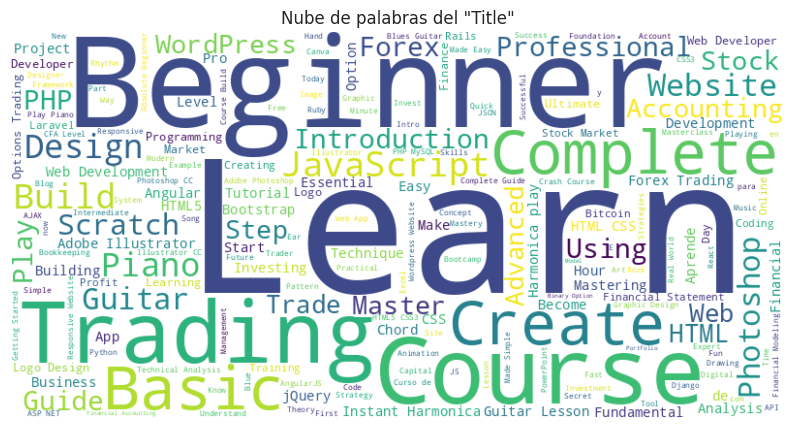

In [33]:
titulo = ude['course_title'].dropna().astype(str) 
titulo = ' '.join(titulo)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(titulo)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nube de palabras del "Title"')
plt.axis('off')
plt.show()

Se guarda el dataset limpio para la posterior realización del tablero de control

In [34]:
ude.to_csv('Udemy_clean.csv')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b76a81c6-cb65-4f6e-8146-eb08d244366b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>